In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# read the sensor dataset
df_skin = pd.read_csv("/content/drive/Shareddrives/DL Project/anonymous data_master/master_skin_T.csv", sep = "\t")

In [ ]:
df_hr = pd.read_csv("/content/drive/Shareddrives/DL Project/anonymous data_master/HeartRateConsolidated.csv", sep = ",")

In [ ]:
df_acc= pd.read_csv("/content/drive/Shareddrives/DL Project/anonymous data_master/master_activity.csv", sep = "\t")

In [ ]:
df_wea = pd.read_csv("/content/drive/Shareddrives/DL Project/anonymous data_master/master_weather.csv", sep = ",")

In [ ]:
# read the survey data
df_com = pd.read_csv("/content/drive/Shareddrives/DL Project/anonymous data_master/comfort_survey.csv", sep = ",")
df_back = pd.read_csv("/content/drive/Shareddrives/DL Project/anonymous data_master/background_survey.csv", sep = ",")

Occupant 1

Data preprocessing

In [ ]:
df_skin = df_skin.rename(columns={'Name ID': 'ID'})
df_skin = df_skin.replace('ID_1', 1)

In [ ]:
df_skin_1 = df_skin.query('ID == 1')
df_skin_1

,Time,Position,Value,Serial No.,ID,Calibrated Value
0,2016-11-28 14:38:00,Ankle,28.34,56000000322AB841,1,28.23
1,2016-11-28 14:39:00,Ankle,29.15,56000000322AB841,1,29.05
2,2016-11-28 14:40:00,Ankle,32.20,56000000322AB841,1,32.10
3,2016-11-28 14:41:00,Ankle,33.08,56000000322AB841,1,32.98
4,2016-11-28 14:42:00,Ankle,33.14,56000000322AB841,1,33.04
...,...,...,...,...,...,...
55240,2016-12-12 14:00:00,Wrist,31.66,17000000322B7641,1,31.06
55241,2016-12-12 14:01:00,Wrist,31.91,17000000322B7641,1,31.31
55242,2016-12-12 14:02:00,Wrist,31.29,17000000322B7641,1,30.68
55243,2016-12-12 14:03:00,Wrist,28.35,17000000322B7641,1,27.75


In [ ]:
df_skin_1.isna().sum()

Time                0
Position            0
Value               0
Serial No.          0
ID                  0
Calibrated Value    0
dtype: int64

<Axes: >

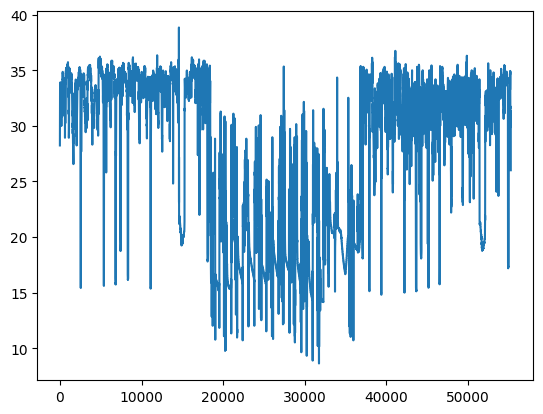

In [ ]:
df_skin_1['Calibrated Value'].plot()

<ipython-input-12-510bc40d3976>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_skin_1['Calibrated Value'] = scaler.fit_transform(df_skin_1['Calibrated Value'].values.reshape(-1, 1))


<Axes: >

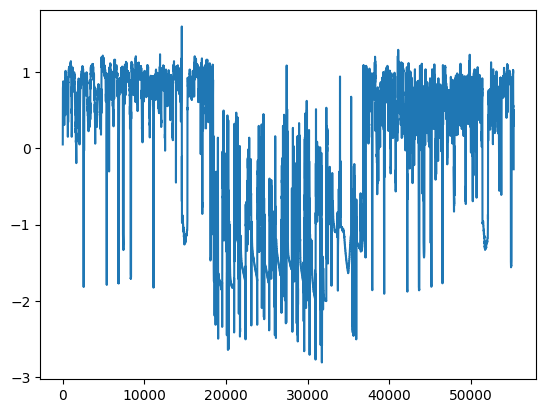

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_skin_1['Calibrated Value'] = scaler.fit_transform(df_skin_1['Calibrated Value'].values.reshape(-1, 1))
df_skin_1['Calibrated Value'].plot()

In [ ]:
df_hr = df_hr.rename(columns={'Sub.ID': 'ID'})
df_hr = df_hr.replace('ID_1', 1)

In [ ]:
df_hr_1 = df_hr.query('ID == 1')
df_hr_1

,Time,HR,ID
3089591,2016-11-28 11:26:44,84.0,1
3089592,2016-11-28 11:26:45,84.0,1
3089593,2016-11-28 11:26:46,84.0,1
3089594,2016-11-28 11:26:47,84.0,1
3089595,2016-11-28 11:26:48,84.0,1
...,...,...,...
3963234,2016-12-12 11:06:31,NaN,1
3963235,2016-12-12 11:06:32,NaN,1
3963236,2016-12-12 11:06:33,NaN,1
3963237,2016-12-12 11:06:34,NaN,1


In [ ]:
df_hr_1.isna().sum()

Time        0
HR      21669
ID          0
dtype: int64

In [ ]:
df_hr_1['HR'] = df_hr_1['HR'].fillna(method='ffill')
df_hr_1

<ipython-input-16-bee1b4495e01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hr_1['HR'] = df_hr_1['HR'].fillna(method='ffill')


,Time,HR,ID
3089591,2016-11-28 11:26:44,84.0,1
3089592,2016-11-28 11:26:45,84.0,1
3089593,2016-11-28 11:26:46,84.0,1
3089594,2016-11-28 11:26:47,84.0,1
3089595,2016-11-28 11:26:48,84.0,1
...,...,...,...
3963234,2016-12-12 11:06:31,114.0,1
3963235,2016-12-12 11:06:32,114.0,1
3963236,2016-12-12 11:06:33,114.0,1
3963237,2016-12-12 11:06:34,114.0,1


<Axes: >

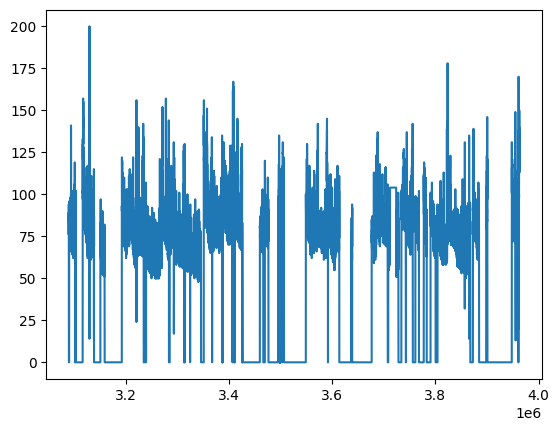

In [ ]:
df_hr_1['HR'].plot()

<ipython-input-18-2298d9bd179f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hr_1['HR'] = df_hr_1['HR'].replace(0, df_hr_1['HR'].median())


<Axes: >

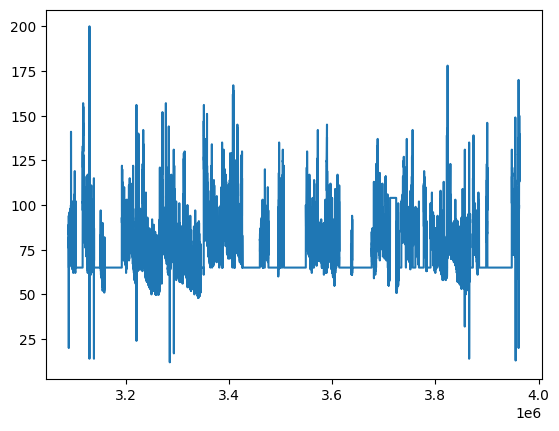

In [ ]:
#replace the zero values
df_hr_1['HR'] = df_hr_1['HR'].replace(0, df_hr_1['HR'].median())
df_hr_1['HR'].plot()

<ipython-input-19-c11106756944>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hr_1['HR'] = scaler.fit_transform(df_hr_1['HR'].values.reshape(-1, 1))


<Axes: >

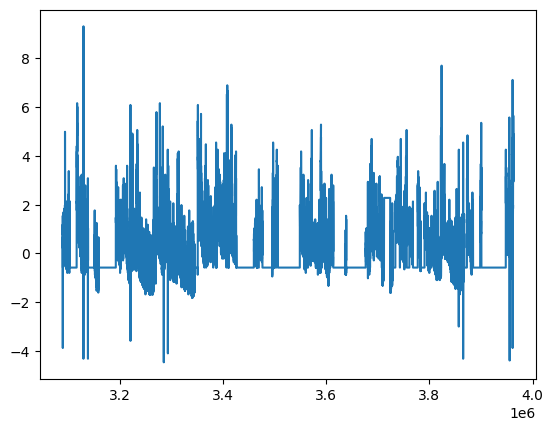

In [ ]:
df_hr_1['HR'] = scaler.fit_transform(df_hr_1['HR'].values.reshape(-1, 1))
df_hr_1['HR'].plot()

In [ ]:
df_acc = df_acc.rename(columns={'Name ID': 'ID'})
df_acc = df_acc.replace('ID_1', 1)

In [ ]:
df_acc_1 = df_acc.query('ID == 1')
df_acc_1

,Date_time,X,Y,Z,ID
0,2016-11-28 14:18:38.000,-3.074,7.230,7.537,1
1,2016-11-28 14:18:38.200,-2.547,7.134,6.263,1
2,2016-11-28 14:18:38.400,-2.777,7.163,6.100,1
3,2016-11-28 14:18:38.600,-2.480,7.144,6.138,1
4,2016-11-28 14:18:38.800,-2.624,7.278,5.851,1
...,...,...,...,...,...
96026,2016-12-07 08:12:35.573,-1.867,2.557,8.724,1
96027,2016-12-07 08:12:35.633,-1.781,2.834,8.897,1
96028,2016-12-07 08:12:35.693,-1.656,2.681,8.906,1
96029,2016-12-07 08:12:35.753,-1.704,2.595,8.897,1


In [ ]:
df_acc_1.isna().sum()

Date_time    0
X            0
Y            0
Z            0
ID           0
dtype: int64

In [ ]:
df_acc_1[['X', 'Y', 'Z']]= scaler.fit_transform(df_acc_1[['X', 'Y', 'Z']])
df_acc_1[['X', 'Y', 'Z']]

<ipython-input-23-ec751489bfab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc_1[['X', 'Y', 'Z']]= scaler.fit_transform(df_acc_1[['X', 'Y', 'Z']])


,X,Y,Z
0,-0.194576,1.402826,0.519495
1,-0.073000,1.381953,0.275533
2,-0.126060,1.388258,0.244319
3,-0.057543,1.384127,0.251596
4,-0.090763,1.413263,0.196637
...,...,...,...
96026,0.083873,0.386774,0.746797
96027,0.103713,0.447002,0.779925
96028,0.132550,0.413735,0.781649
96029,0.121476,0.395036,0.779925


In [ ]:
df_com = df_com.rename(columns={'Name.ID': 'ID'})
df_com = df_com.replace('ID_1', 1)

In [ ]:
df_com.isna().sum()

Time          0
therm_sens    0
therm_pref    0
location      0
ID            0
dtype: int64

In [ ]:
df_com_1 = df_com.query('ID == 1')
df_com_1_prf = df_com_1['therm_pref']
df_com_1_prf

0         Warmer
1         Warmer
2      No Change
3      No Change
4         Warmer
         ...    
147    No Change
148    No Change
149    No Change
150    No Change
151       Warmer
Name: therm_pref, Length: 152, dtype: object

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
df_com_1_prf = encoder.fit_transform(df_com_1_prf.values.reshape(-1,1))
df_com_1_prf

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0

In [ ]:
df_wea['Humidity'] = df_wea['Humidity'].str.strip('%')
df_wea['Humidity'] = df_wea['Humidity'].astype(float)
df_wea[['Temperature ', 'Humidity']]= scaler.fit_transform(df_wea[['Temperature ', 'Humidity']])
df_wea

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind gust,Pressure,Precip Rate,Precip Accu,UV,Solar
0,8/31/2015 0:53,0.350968,NaN,0.160199,NaN,No wind,NaN,NaN,NaN,NaN,NaN,NaN
1,8/31/2015 1:53,0.350968,NaN,0.328958,NaN,3.1,NaN,NaN,NaN,NaN,NaN,NaN
2,8/31/2015 2:53,0.487905,NaN,0.272705,NaN,2.2,NaN,NaN,NaN,NaN,NaN,NaN
3,8/31/2015 3:53,0.738956,NaN,0.160199,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
4,8/31/2015 4:53,0.738956,NaN,0.160199,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
44738,6/28/2017 23:30,-0.516300,10.8,0.891486,SSE,1.3,2.2,29.9,0.0,0.0,0.0,0.0
44739,6/28/2017 23:40,-0.539122,10.9,0.947739,East,2.7,4.5,29.9,0.0,0.0,0.0,0.0
44740,6/28/2017 23:45,-0.539122,10.9,0.947739,East,1.3,4.0,29.9,0.0,0.0,0.0,0.0
44741,6/28/2017 23:50,-0.539122,10.9,0.947739,SSE,1.8,4.9,29.9,0.0,0.0,0.0,0.0


In [ ]:
df_skin_1 = df_skin_1.iloc[34:]
df_skin_1 = df_skin_1.iloc[:-35]
df_skin_1

,Time,Position,Value,Serial No.,ID,Calibrated Value
34,2016-11-28 15:12:00,Ankle,33.52,56000000322AB841,1,0.805791
35,2016-11-28 15:13:00,Ankle,33.52,56000000322AB841,1,0.805791
36,2016-11-28 15:14:00,Ankle,33.52,56000000322AB841,1,0.805791
37,2016-11-28 15:15:00,Ankle,33.52,56000000322AB841,1,0.805791
38,2016-11-28 15:16:00,Ankle,33.52,56000000322AB841,1,0.805791
...,...,...,...,...,...,...
55205,2016-12-12 13:25:00,Wrist,31.72,17000000322B7641,1,0.471847
55206,2016-12-12 13:26:00,Wrist,31.60,17000000322B7641,1,0.454348
55207,2016-12-12 13:27:00,Wrist,31.47,17000000322B7641,1,0.435391
55208,2016-12-12 13:28:00,Wrist,31.41,17000000322B7641,1,0.426641


In [ ]:
df_skin_1_2d = df_skin_1['Calibrated Value']
df_skin_1_2d = df_skin_1_2d.values.reshape(152, 363)
df_skin_1_2d

array([[0.80579058, 0.80579058, 0.80579058, ..., 0.78829136, 0.78829136,
        0.78829136],
       [0.79704097, 0.78829136, 0.76933388, ..., 1.05223785, 1.06098746,
        1.06098746],
       [1.06098746, 1.06098746, 1.06098746, ..., 0.40622518, 0.43393227,
        0.46018109],
       ...,
       [0.8364142 , 0.85391342, 0.8728709 , ..., 0.80870711, 0.84516381,
        0.8728709 ],
       [0.9093276 , 0.91807721, 0.7912079 , ..., 0.90057799, 0.90057799,
        0.90057799],
       [0.89037012, 0.88162051, 0.8728709 , ..., 0.43539054, 0.42664093,
        0.44414014]])

In [ ]:
df_hr_1 = df_hr_1.iloc[52:]
df_hr_1 = df_hr_1.iloc[:-52]
df_hr_1

,Time,HR,ID
3089643,2016-11-28 11:27:36,1.173964,1
3089644,2016-11-28 11:27:37,1.173964,1
3089645,2016-11-28 11:27:38,1.173964,1
3089646,2016-11-28 11:27:39,1.173964,1
3089647,2016-11-28 11:27:40,1.173964,1
...,...,...,...
3963182,2016-12-12 11:05:39,3.005980,1
3963183,2016-12-12 11:05:40,3.005980,1
3963184,2016-12-12 11:05:41,3.005980,1
3963185,2016-12-12 11:05:42,3.005980,1


In [ ]:
df_hr_1_2d = df_hr_1['HR']
df_hr_1_2d = df_hr_1_2d.values.reshape(152, 5747)
df_hr_1_2d

array([[ 1.17396387,  1.17396387,  1.17396387, ...,  0.07475423,
         0.14803487,  0.14803487],
       [ 0.14803487,  0.22131551,  0.22131551, ...,  1.68692837,
         1.68692837,  1.68692837],
       [ 1.68692837,  1.68692837,  1.68692837, ..., -0.58477156,
        -0.58477156, -0.58477156],
       ...,
       [-0.58477156, -0.58477156, -0.58477156, ...,  0.66099937,
         0.58771873,  0.66099937],
       [ 0.66099937,  0.66099937,  0.66099937, ...,  0.29459616,
         0.22131551,  0.22131551],
       [ 0.29459616,  0.3678768 ,  0.3678768 , ...,  3.00597994,
         3.00597994,  3.00597994]])

In [ ]:
df_acc_1 = df_acc_1.iloc[60:]
df_acc_1 = df_acc_1.iloc[:-59]
df_acc_1

,Date_time,X,Y,Z,ID
60,2016-11-28 14:18:50.000,0.390929,0.742707,0.631327,1
61,2016-11-28 14:18:50.200,0.231980,1.101033,0.524857,1
62,2016-11-28 14:18:50.400,0.329102,1.007320,0.306746,1
63,2016-11-28 14:18:50.600,0.209833,1.292589,0.158147,1
64,2016-11-28 14:18:50.800,-0.006790,1.379996,0.438685,1
...,...,...,...,...,...
95967,2016-12-07 08:12:32.033,0.675838,0.386774,0.889842,1
95968,2016-12-07 08:12:32.093,0.551954,0.334590,0.904587,1
95969,2016-12-07 08:12:32.153,0.494742,0.324154,0.812862,1
95970,2016-12-07 08:12:32.213,0.518965,0.315891,0.829331,1


In [ ]:
df_acc_1_2d = df_acc_1[['X', 'Y', 'Z']]
df_acc_1_2d = df_acc_1_2d.values.reshape(152, 1893)
df_acc_1_2d

array([[ 0.39092872,  0.74270723,  0.63132677, ...,  0.06841655,
         1.22801195,  0.22976567],
       [-0.10621987,  1.22996882,  0.31593758, ..., -0.47071861,
         1.2612788 ,  0.16906235],
       [-0.47948504,  1.2591045 ,  0.15623231, ...,  0.16553931,
         1.35716562,  0.27553253],
       ...,
       [ 0.45944525, -0.10679345,  0.87528902, ...,  0.46613542,
        -0.11940441,  0.87701245],
       [ 0.46382847, -0.12984107,  0.86973571, ...,  0.49266539,
        -0.12353559,  0.88256575],
       [ 0.49474165, -0.11092462,  0.88256575, ...,  0.47051863,
         0.28262445,  0.82569229]])

In [ ]:
df_wea_1 = df_wea.iloc[28:]
df_wea_1 = df_wea_1.iloc[:-27]
df_wea_1

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind gust,Pressure,Precip Rate,Precip Accu,UV,Solar
28,9/1/2015 5:53,0.602019,NaN,0.328958,NaN,3.6,NaN,NaN,NaN,NaN,NaN,NaN
29,9/1/2015 6:53,0.602019,NaN,0.160199,NaN,No wind,NaN,NaN,NaN,NaN,NaN,NaN
30,9/1/2015 7:53,0.738956,NaN,0.160199,NaN,2.2,NaN,NaN,NaN,NaN,NaN,NaN
31,9/1/2015 8:53,0.990007,NaN,-0.008559,NaN,3.6,NaN,NaN,NaN,NaN,NaN,NaN
32,9/1/2015 9:53,1.241058,NaN,-0.402329,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
44711,6/28/2017 21:05,-0.379363,11.2,0.778980,SSE,1.3,2.7,29.9,0.0,0.0,0.0,0.0
44712,6/28/2017 21:10,-0.402185,11.2,0.835233,South,0.9,2.2,29.9,0.0,0.0,0.0,0.0
44713,6/28/2017 21:15,-0.425008,11.1,0.835233,South,1.3,3.6,29.9,0.0,0.0,0.0,0.0
44714,6/28/2017 21:20,-0.425008,11.1,0.835233,SSW,0.4,1.3,29.9,0.0,0.0,0.0,0.0


In [ ]:
df_wea_1_2d = df_wea_1[['Temperature ', 'Humidity']]
df_wea_1_2d = df_wea_1_2d.values.reshape(152, 588)
df_wea_1_2d

array([[ 0.6020189 ,  0.32895758,  0.6020189 , ..., -0.45858183,
         0.73895585, -0.68359309],
       [ 0.99000694, -0.90860435,  0.85306998, ..., -0.90860435,
         0.99000694, -0.90860435],
       [ 0.85306998, -0.79609872,  0.48790477, ...,  1.06024418,
        -0.33371697,  1.06024418],
       ...,
       [ 0.09991672,  0.66647447,  0.12273955, ..., -0.06481212,
         1.01282977, -0.17731776],
       [ 0.94436129, -0.12106494,  0.92153846, ...,  0.3852104 ,
         0.25967651,  0.3852104 ],
       [ 0.30532216,  0.32895758,  0.30532216, ...,  0.83523292,
        -0.4478311 ,  0.83523292]])

Test MCDCNN

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
tf.config.run_functions_eagerly(True)

In [ ]:
conv2_layers = []

#skin temperature
input_layer_skin = keras.layers.Input((df_skin_1_2d.shape[1],1))

conv1_layer_skin = keras.layers.Conv1D(filters=8,kernel_size=5,activation='relu')(input_layer_skin)
conv1_layer_skin = keras.layers.MaxPooling1D(pool_size=2)(conv1_layer_skin)

conv2_layer_skin = keras.layers.Conv1D(filters=8,kernel_size=5,activation='relu')(conv1_layer_skin)
conv2_layer_skin = keras.layers.MaxPooling1D(pool_size=2)(conv2_layer_skin)
conv2_layer_skin = keras.layers.Flatten()(conv2_layer_skin)

conv2_layers.append(conv2_layer_skin)

#heart rate
input_layer_hr = keras.layers.Input((df_hr_1_2d.shape[1],1))
   
conv1_layer_hr = keras.layers.Conv1D(filters=8,kernel_size=5,activation='relu')(input_layer_hr)
conv1_layer_hr = keras.layers.MaxPooling1D(pool_size=2)(conv1_layer_hr)

conv2_layer_hr = keras.layers.Conv1D(filters=8,kernel_size=5,activation='relu')(conv1_layer_hr)
conv2_layer_hr = keras.layers.MaxPooling1D(pool_size=2)(conv2_layer_hr)
conv2_layer_hr = keras.layers.Flatten()(conv2_layer_hr)

conv2_layers.append(conv2_layer_hr)

#accelerometer
input_layer_acc = keras.layers.Input((df_acc_1_2d.shape[1],1))
   
conv1_layer_acc = keras.layers.Conv1D(filters=8,kernel_size=5, strides=3, activation='relu')(input_layer_acc)
conv1_layer_acc = keras.layers.MaxPooling1D(pool_size=2)(conv1_layer_acc)

conv2_layer_acc = keras.layers.Conv1D(filters=8,kernel_size=5,activation='relu')(conv1_layer_acc)
conv2_layer_acc = keras.layers.MaxPooling1D(pool_size=2)(conv2_layer_acc)
conv2_layer_acc = keras.layers.Flatten()(conv2_layer_acc)

conv2_layers.append(conv2_layer_acc)

#weather
input_layer_wea = keras.layers.Input((df_wea_1_2d.shape[1],1))
   
conv1_layer_wea = keras.layers.Conv1D(filters=8,kernel_size=5, strides=2, activation='relu')(input_layer_wea)
conv1_layer_wea = keras.layers.MaxPooling1D(pool_size=2)(conv1_layer_wea)

conv2_layer_wea = keras.layers.Conv1D(filters=8,kernel_size=5,activation='relu')(conv1_layer_wea)
conv2_layer_wea = keras.layers.MaxPooling1D(pool_size=2)(conv2_layer_wea)
conv2_layer_wea = keras.layers.Flatten()(conv2_layer_wea)

conv2_layers.append(conv2_layer_wea)

#concat
concat_layer = keras.layers.Concatenate(axis=-1)(conv2_layers)

fully_connected = keras.layers.Dense(units=732,activation='relu')(concat_layer)

output_layer = keras.layers.Dense(3, activation='softmax')(fully_connected)

model = keras.models.Model(inputs=[input_layer_skin, input_layer_hr, input_layer_acc, input_layer_wea], outputs=output_layer)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 363, 1)]     0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 5747, 1)]    0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1893, 1)]    0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 588, 1)]     0           []                               
                                                                                              

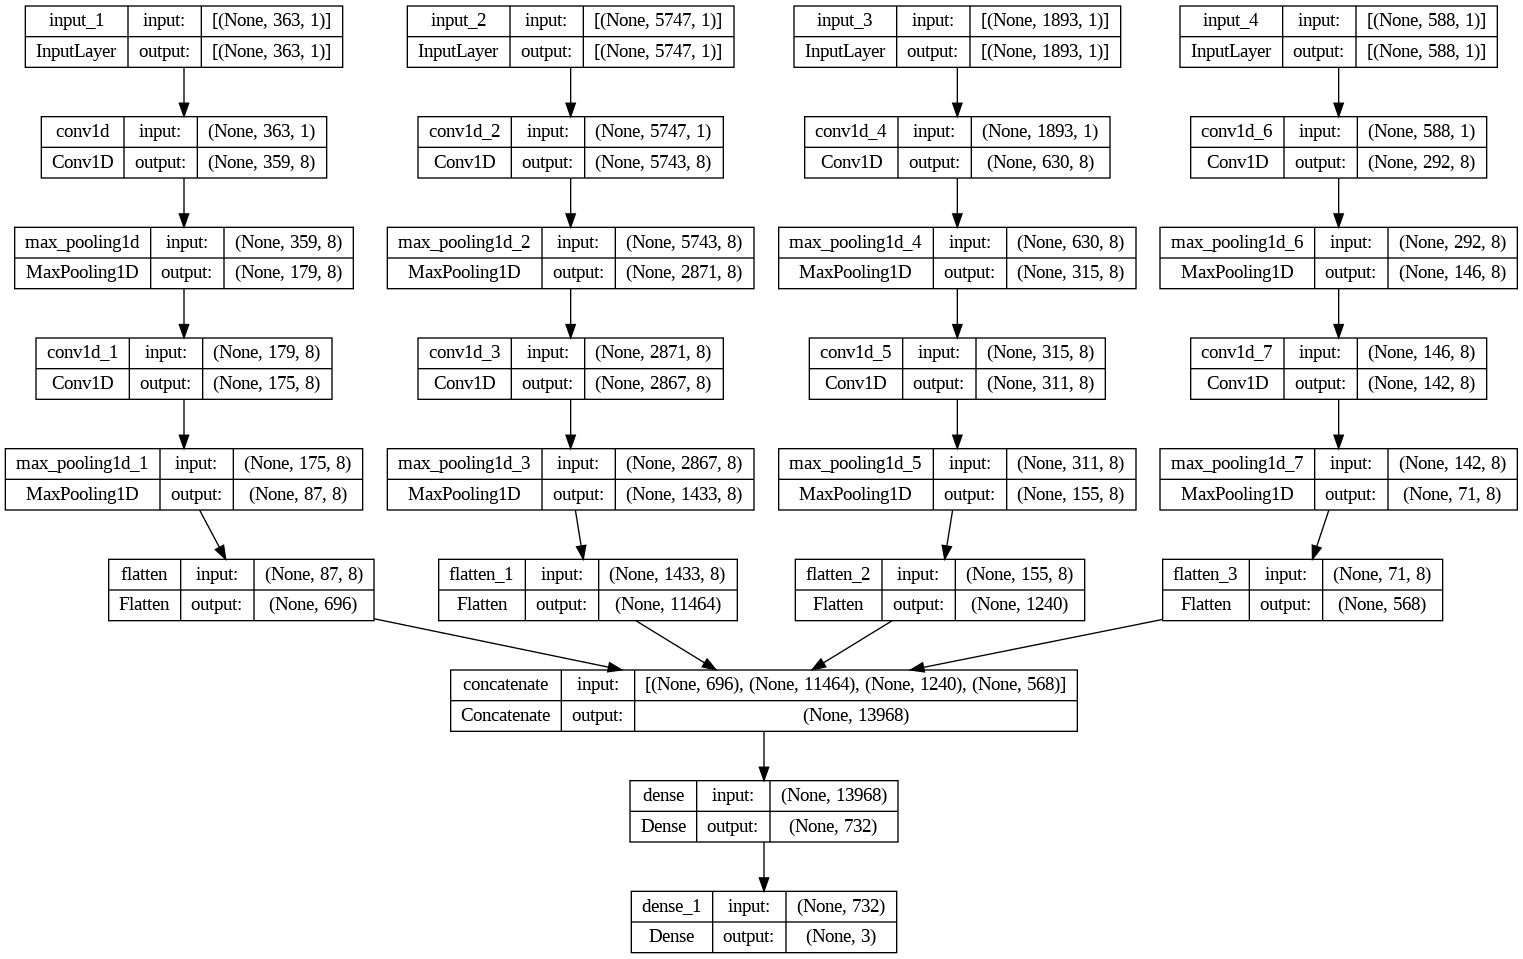

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
x_train_skin, x_test_skin = train_test_split(df_skin_1_2d, test_size=0.2, random_state=42)
x_train_hr, x_test_hr = train_test_split(df_hr_1_2d, test_size=0.2, random_state=42)
x_train_acc, x_test_acc = train_test_split(df_acc_1_2d, test_size=0.2, random_state=42)
x_train_wea, x_test_wea = train_test_split(df_wea_1_2d, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(df_com_1_prf, test_size=0.2, random_state=42)

In [ ]:
x_train_skin.shape

(121, 363)

In [ ]:
x_train_hr.shape

(121, 5747)

In [ ]:
x_train_acc.shape

(121, 1893)

In [ ]:
x_train_wea.shape

(121, 588)

In [ ]:
y_train.shape

(121, 3)

In [ ]:
model.fit(x=[x_train_skin, x_train_hr, x_train_acc, x_train_wea] , y=y_train, validation_data=([x_test_skin, x_test_hr, x_test_acc, x_test_wea], y_test), epochs=50)

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
4/4 [==============================] - 8s 239ms/step - loss: 9.4434 - accuracy: 0.3140 - val_loss: 1.7087 - val_accuracy: 0.3871
Epoch 2/50
4/4 [==============================] - 0s 103ms/step - loss: 1.3945 - accuracy: 0.4959 - val_loss: 1.1069 - val_accuracy: 0.4516
Epoch 3/50
4/4 [==============================] - 0s 95ms/step - loss: 1.0251 - accuracy: 0.6281 - val_loss: 1.1041 - val_accuracy: 0.5484
Epoch 4/50
4/4 [==============================] - 0s 111ms/step - loss: 0.9495 - accuracy: 0.5950 - val_loss: 1.0157 - val_accuracy: 0.4516
Epoch 5/50
4/4 [==============================] - 1s 133ms/step - loss: 0.5996 - accuracy: 0.8099 - val_loss: 0.9119 - val_accuracy: 0.4194
Epoch 6/50
4/4 [==============================] - 0s 130ms/step - loss: 0.9791 - accuracy: 0.6033 - val_loss: 0.9871 - val_accuracy: 0.4839
Epoch 7/50
4/4 [==============================] - 0s 132ms/step - loss: 0.7495 - accuracy: 0.7107 - val_loss: 0.9732 - val_accuracy: 0.5484
Epoch 8/50
4/4 [=====